# Glass Identification

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [168]:
df_glass = pd.read_csv(r"C:\Users\chaud\Downloads\Glass Identification.csv", header=None)
df_glass.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [169]:
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
df_glass.columns = column_names

In [170]:
df_glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [171]:
df_glass.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [172]:
df_glass.shape

(214, 11)

In [173]:
df_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [174]:
df_glass.describe().T.style.background_gradient(cmap = "PuBuGn")

,count,mean,std,min,25%,50%,75%,max
Id,214.000000,107.500000,61.920648,1.000000,54.250000,107.500000,160.750000,214.000000
RI,214.000000,1.518365,0.003037,1.511150,1.516522,1.517680,1.519157,1.533930
Na,214.000000,13.407850,0.816604,10.730000,12.907500,13.300000,13.825000,17.380000
Mg,214.000000,2.684533,1.442408,0.000000,2.115000,3.480000,3.600000,4.490000
Al,214.000000,1.444907,0.499270,0.290000,1.190000,1.360000,1.630000,3.500000
Si,214.000000,72.650935,0.774546,69.810000,72.280000,72.790000,73.087500,75.410000
K,214.000000,0.497056,0.652192,0.000000,0.122500,0.555000,0.610000,6.210000
Ca,214.000000,8.956963,1.423153,5.430000,8.240000,8.600000,9.172500,16.190000
Ba,214.000000,0.175047,0.497219,0.000000,0.000000,0.000000,0.000000,3.150000
Fe,214.000000,0.057009,0.097439,0.000000,0.000000,0.000000,0.100000,0.510000


In [175]:
df_glass.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

<Axes: >

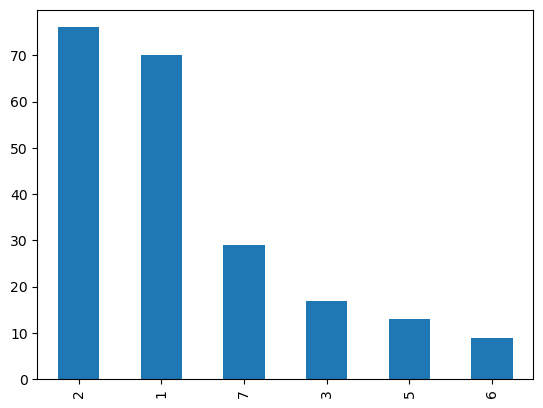

In [176]:
df_glass['Type_of_glass'].value_counts().plot(kind='bar')

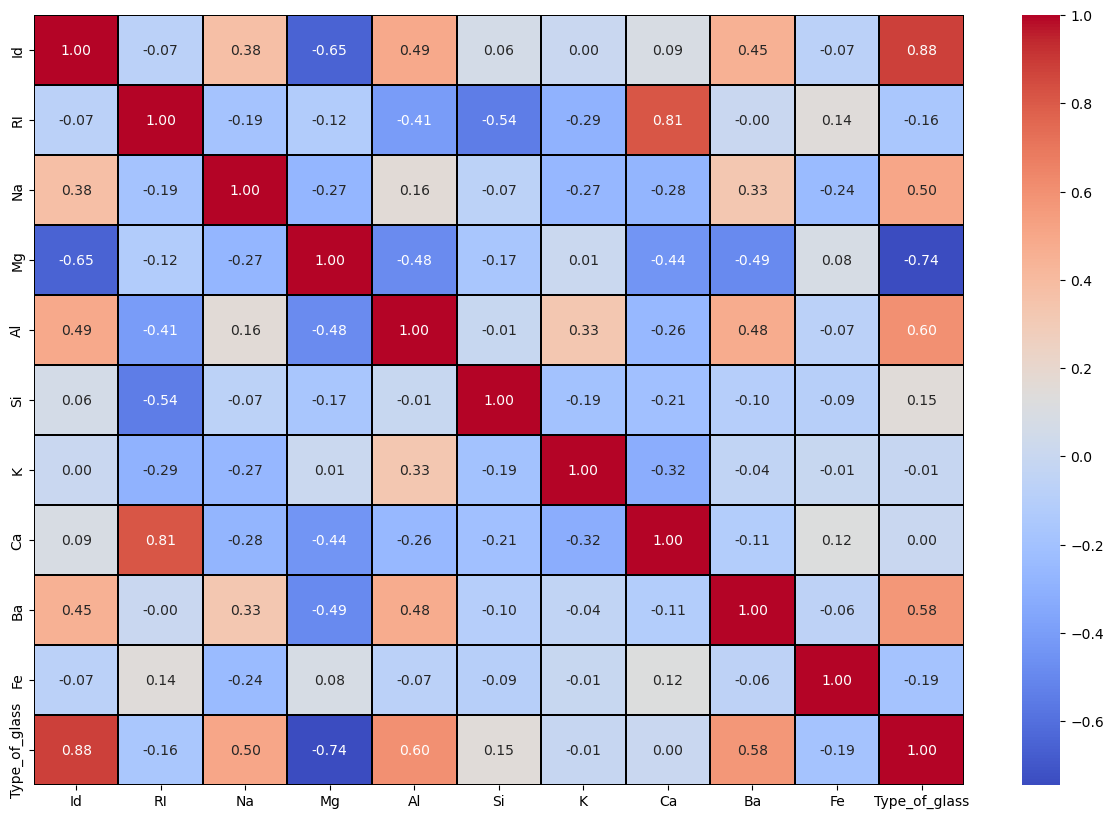

In [177]:
plt.figure(figsize=(15, 10))                            
sns.heatmap(df_glass.corr(), annot = True, fmt='0.2f', cmap= 'coolwarm', linewidths=0.2, linecolor='black')
plt.show()

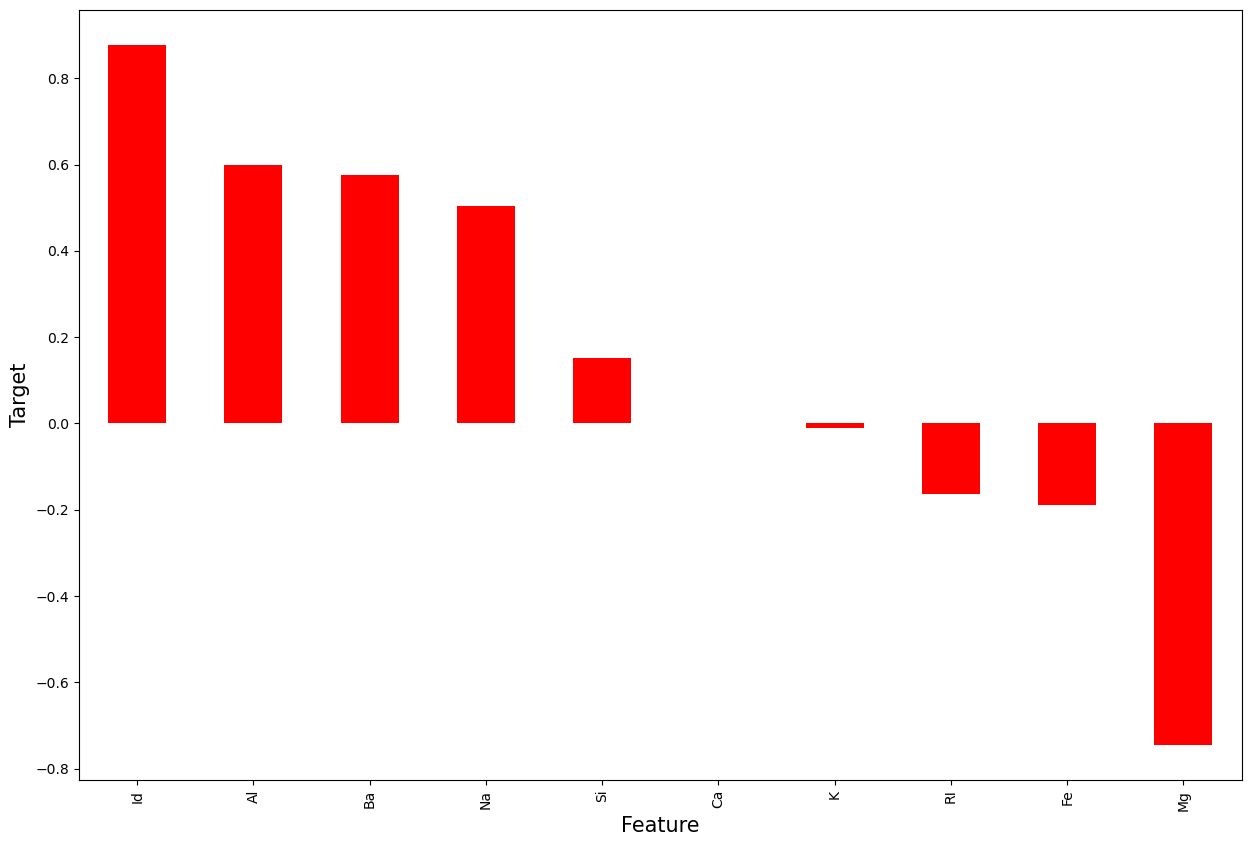

In [178]:
plt.figure(figsize=(15, 10))                            
df_glass.corr()['Type_of_glass'].sort_values(ascending= False).drop(['Type_of_glass']).plot(kind='bar',color='r')
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Target",fontsize = 15)
plt.show()

In [179]:
import scipy.stats as stats
corr_p= df_glass.corr('pearson')
corr_p= corr_p.loc['Type_of_glass'].sort_values(ascending=False)
corr_p

Type_of_glass    1.000000
Id               0.877357
Al               0.598829
Ba               0.575161
Na               0.502898
Si               0.151565
Ca               0.000952
K               -0.010054
RI              -0.164237
Fe              -0.188278
Mg              -0.744993
Name: Type_of_glass, dtype: float64

In [180]:
df_glass.skew()

Id               0.000000
RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type_of_glass    1.114915
dtype: float64

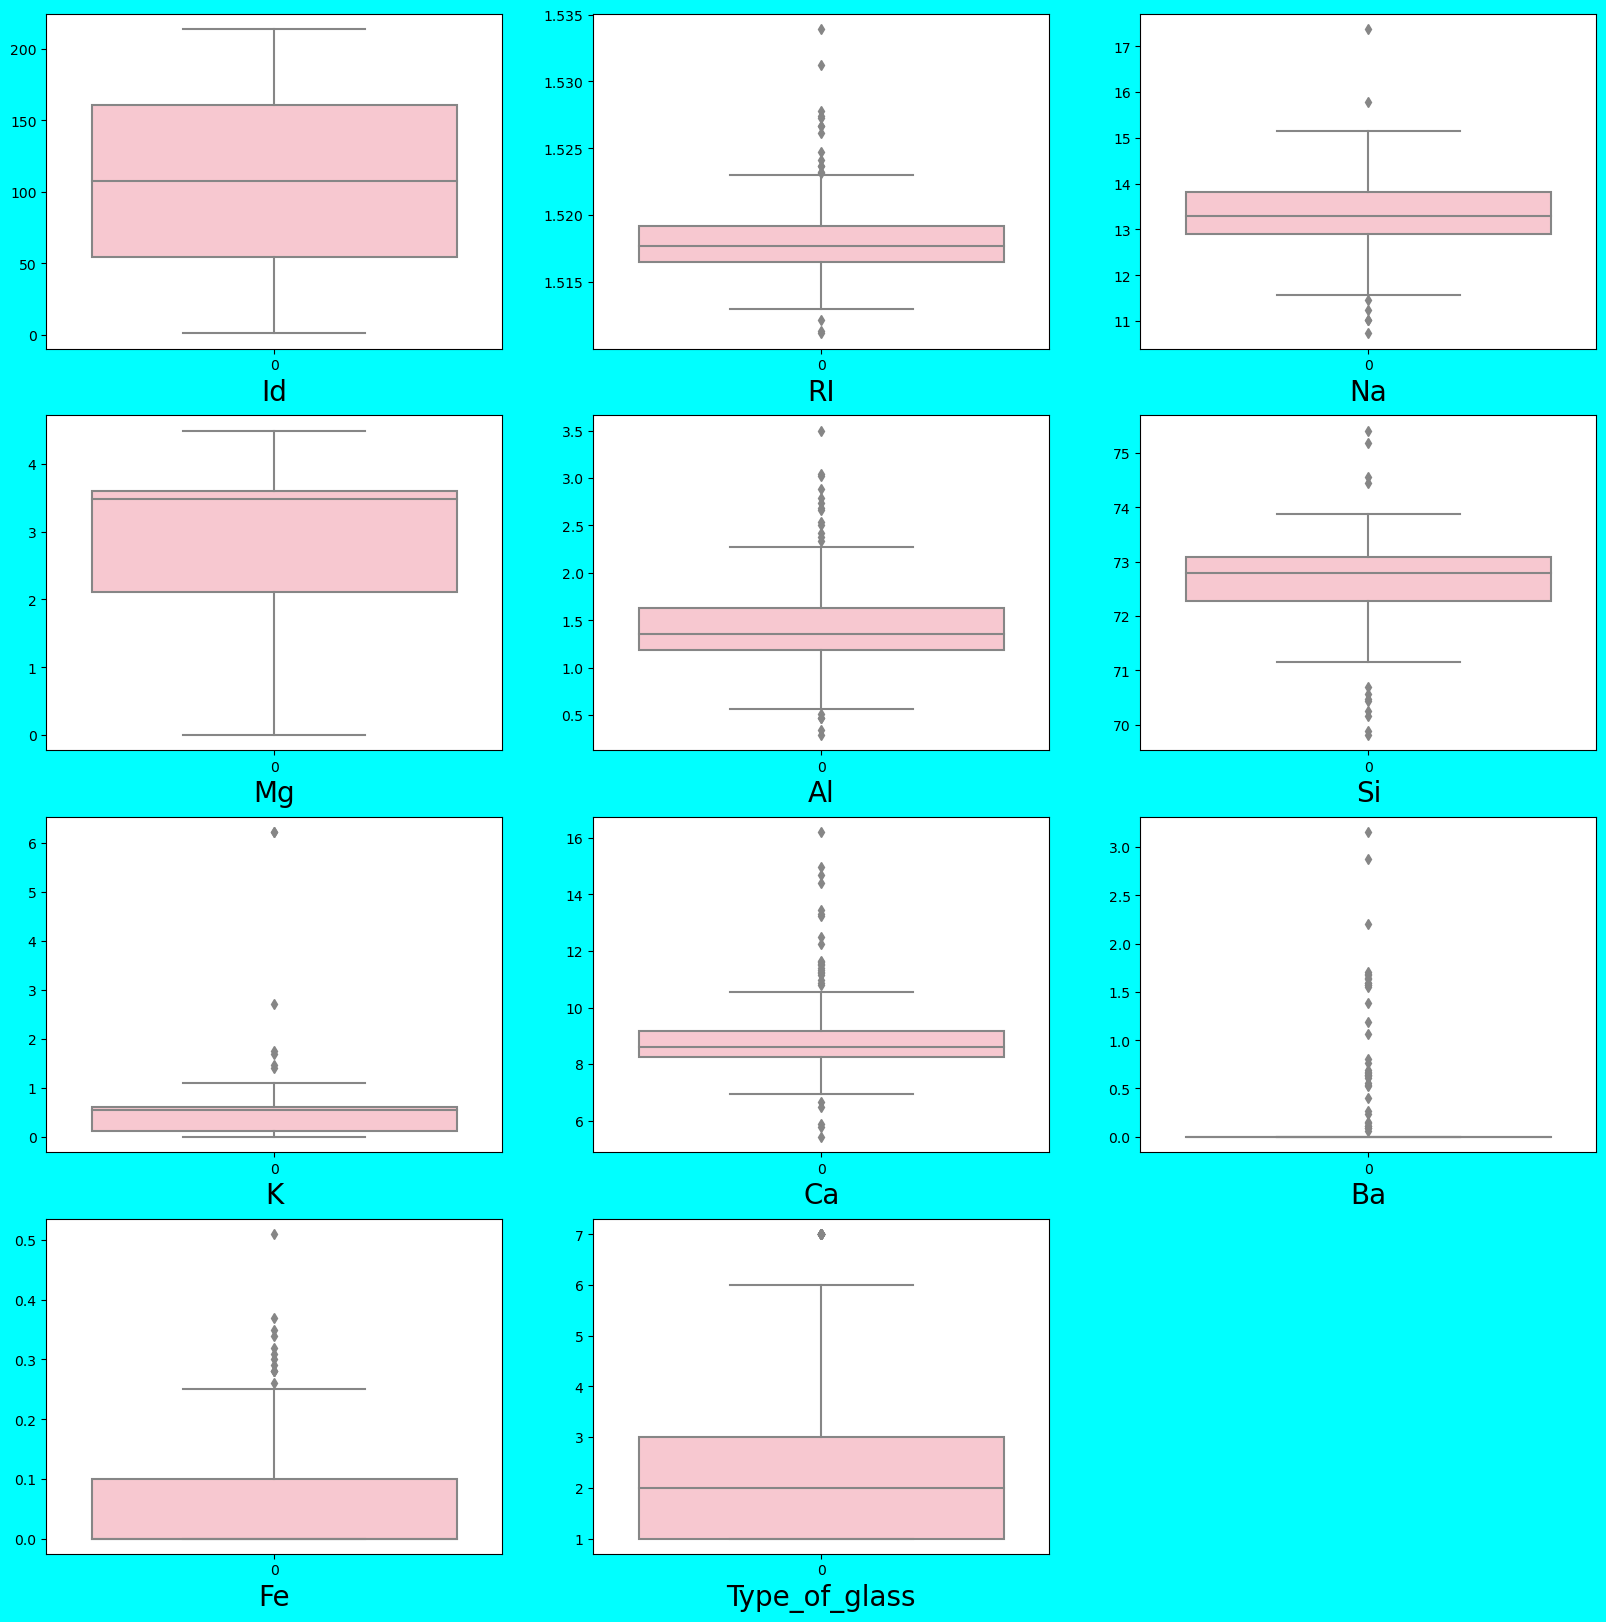

In [181]:
plt.figure(figsize=(20,20), facecolor='cyan')
plot_number=1

for column in df_glass:
    if plot_number <= 20:
        ax=plt.subplot(4,3, plot_number)
        sns.boxplot(df_glass[column], color='pink')
        plt.xlabel(column, fontsize=20)

    plot_number+=1

plt.show()

The dataset's boxplots suggest that while some variables (Na, Al, Si) exhibit fairly symmetrical distributions around their medians, others show varying degrees of right skewness (Mg, K, Ba, Fe), with a number of outliers indicating higher values. Notably, Potassium and Barium have strong right-skewed distributions with several outliers, indicating that most samples contain low levels of these elements, but a few contain significantly higher levels.

### Removing Outliers and Skewness in Dataset

In [182]:
from scipy import stats

z = abs(stats.zscore(df_glass))

df = df_glass[(z < 3).all(axis=1)]

df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


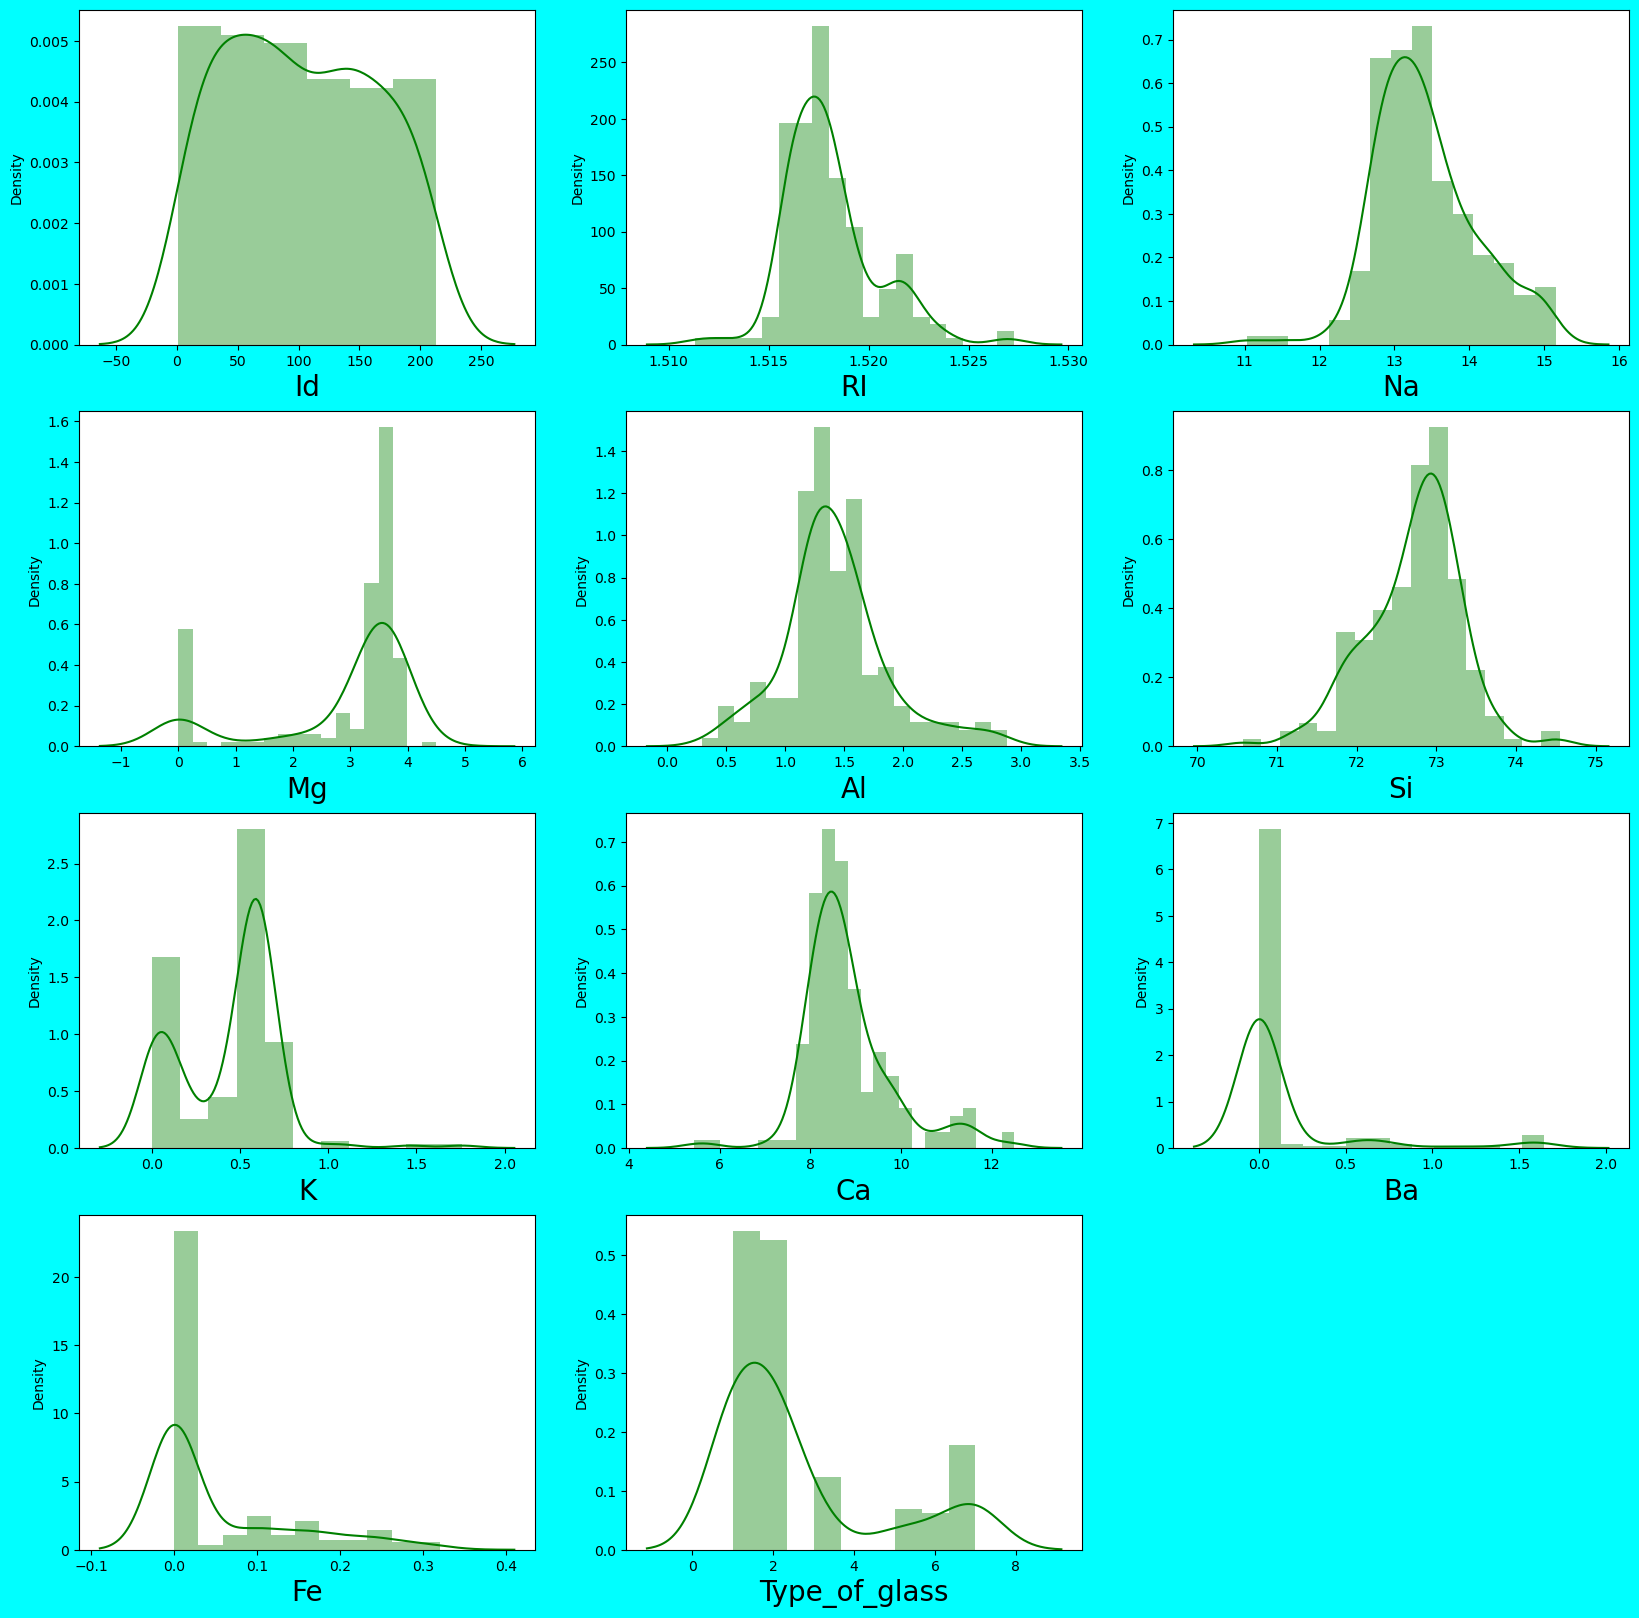

In [183]:
plt.figure(figsize=(20,20), facecolor='cyan')
plot_number=1

for column in df:
    if plot_number <= 20:
        ax=plt.subplot(4,3, plot_number)
        sns.distplot(df[column], color='green')
        plt.xlabel(column, fontsize=20)

    plot_number+=1

plt.show()

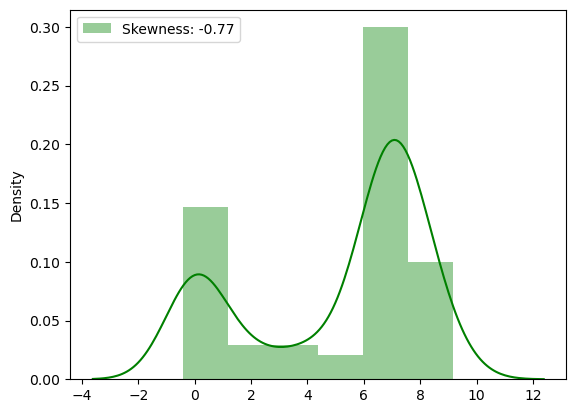

In [146]:
from scipy import stats
from scipy.stats import boxcox
df = df_glass["Mg"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
df= stats.boxcox(df)
df= pd.Series(df[0])
t=sns.distplot(df,label="Skewness: %.2f"%(df.skew()),color='green' )
t.legend()

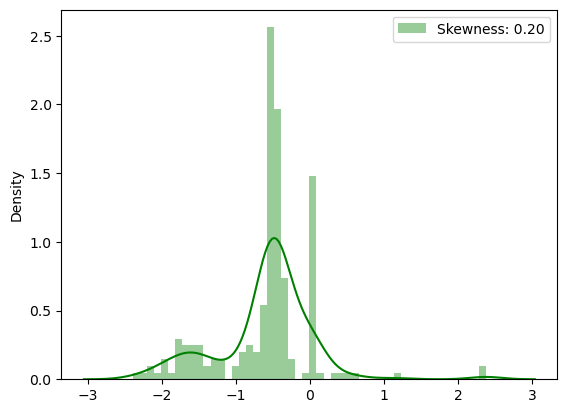

In [145]:
df = df_glass["K"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
df= stats.boxcox(df)
df= pd.Series(df[0])
t=sns.distplot(df,label="Skewness: %.2f"%(df.skew()), color='green')
t.legend()

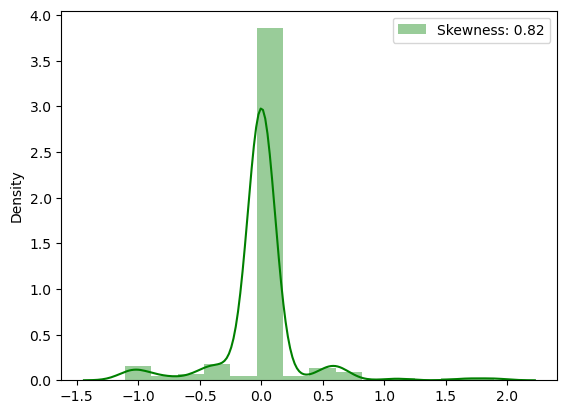

In [148]:
df = df_glass["Ba"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
df= stats.boxcox(df)
df= pd.Series(df[0])
t=sns.distplot(df,label="Skewness: %.2f"%(df.skew()),color='green' )
t.legend()

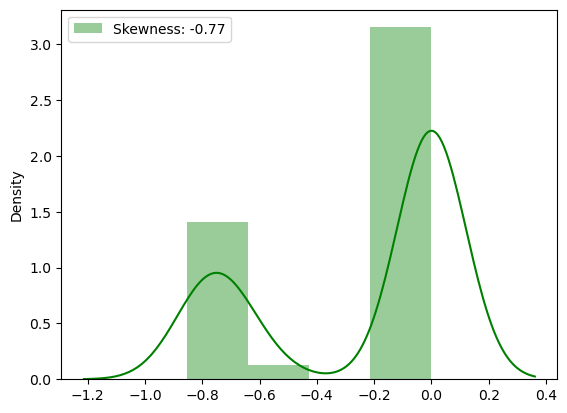

In [147]:
df = df_glass["Fe"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
df= stats.boxcox(df)
df= pd.Series(df[0])
t=sns.distplot(df,label="Skewness: %.2f"%(df.skew()),color='green' )
t.legend()

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import  StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [185]:
X= df.drop('Type_of_glass', axis= 1)
Y= df['Type_of_glass']

scaler = StandardScaler()
X= scaler.fit_transform(X)
X_train,X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)

In [186]:
X.shape

(194, 10)

In [187]:
Y.shape

(194,)

In [188]:
X_train.shape

(155, 10)

In [189]:
Y_train.shape

(155,)

In [190]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [191]:
y_pred = lg.predict(X_test)

In [209]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred)*100)

92.3076923076923


In [204]:
print(confusion_matrix(y_pred,Y_test))

[[12  0  0  0  0  0]
 [ 1 12  0  2  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  8]]


In [202]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,Y_train)
y_pred2= rf.predict(X_test)
score_rf= accuracy_score(y_pred2,Y_test)

print('\nAccuracy Score of Random Forest Classifier:', score_rf*100)


Accuracy Score of Random Forest Classifier: 100.0


In [203]:
print(confusion_matrix(y_pred2,Y_test))

[[13  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  8]]


In [207]:
from sklearn.neighbors import KNeighborsClassifier

accuracy =[]
for i in range (1,11):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    y_pred5= model.predict(X_test)
    accuracy.append(model.score(X_test,Y_test))
score_knn= max(accuracy)

print('\nAccuracy of K Nearest Neighbors Classsifier:', score_knn*100)


Accuracy of K Nearest Neighbors Classsifier: 89.74358974358975


In [201]:
print(confusion_matrix(y_pred5,Y_test))

[[13  2  0  0  0  0]
 [ 0 10  2  2  0  1]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  1  7]]


In [197]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
y_pred3 = gbc.predict(X_test)
score_gbc = accuracy_score(y_pred3,Y_test)

print('\nAccuracy score of Gradient Boost Classifer:',score_gbc*100)


Accuracy score of Gradient Boost Classifer: 94.87179487179486


In [200]:
print(confusion_matrix(y_pred3,Y_test))

[[13  0  0  0  0  0]
 [ 0 12  0  2  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  8]]
